<a href="https://colab.research.google.com/github/sindhuja279/AILab/blob/main/SimulatedAnnealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install joblib==1.2.0
import mlrose_hiive as mlrose
import numpy as np

# Define the objective function
def queens_max(position):
    no_attack_on_j = 0
    queen_not_attacking = 0
    for i in range(len(position) - 1):
        no_attack_on_j = i
        for j in range(i + 1, len(position)):
            if (position[j] != position[i] and
                position[j] != position[i] + (j - i) and
                position[j] != position[i] - (j - i)):
                no_attack_on_j += 1
            if (no_attack_on_j == len(position) - i - 1):
                queen_not_attacking += 1
    if(queen_not_attacking == 7):
        queen_not_attacking += 1
    return queen_not_attacking

# Define the fitness function
objective = mlrose.CustomFitness(queens_max)

# Define the optimization problem
problem = mlrose.DiscreteOpt(length=8, fitness_fn=objective, maximize=True, max_val=8)

# Define the annealing schedule and other parameters
T = mlrose.ExpDecay()
initial_position = np.array([4, 6, 1, 5, 2, 0, 3, 7])

# Run simulated annealing, assigning the extra return value to _
best_position, best_objective, _ = mlrose.simulated_annealing(problem=problem, schedule=T,max_attempts=500, max_iters=1000, init_state=initial_position)

# Print the results
print("The best position found is:", best_position)
print("The number of queens that are not attacking each other is:", best_objective)

The best position found is: [0 7 5 1 6 1 1 5]
The number of queens that are not attacking each other is: 9.0


Best state (Queen positions): [7, 3, 0, 2, 5, 1, 6, 4], Number of conflicts: 0


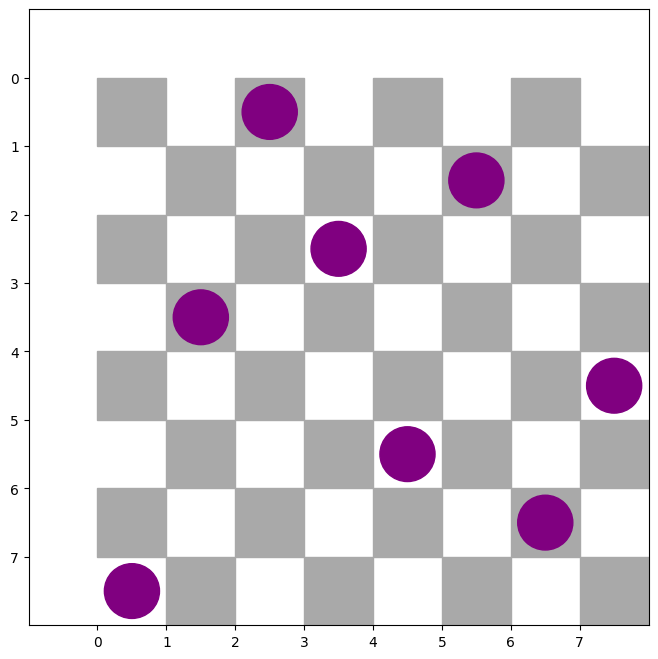

In [32]:
import random
import math
import matplotlib.pyplot as plt

def create_initial_solution(n):
    return random.sample(range(n), n)

def calculate_fitness(state):
    n = len(state)
    row_conflicts = sum([state.count(i) - 1 for i in state])
    diagonal_conflicts = 0

    for i in range(n):
        for j in range(i + 1, n):
            if abs(state[i] - state[j]) == abs(i - j):
                diagonal_conflicts += 1

    return row_conflicts + diagonal_conflicts

def random_neighbor(state):
    neighbor = state[:]
    i = random.randint(0, len(state) - 1)
    neighbor[i] = random.randint(0, len(state) - 1)
    return neighbor

def simulated_annealing(n, initial_temp=1000, cooling_rate=0.95, max_iterations=1000):
    current_solution = create_initial_solution(n)
    current_fitness = calculate_fitness(current_solution)
    best_solution = current_solution
    best_fitness = current_fitness
    temperature = initial_temp

    for iteration in range(max_iterations):
        neighbor = random_neighbor(current_solution)
        neighbor_fitness = calculate_fitness(neighbor)

        fitness_diff = neighbor_fitness - current_fitness

        if fitness_diff < 0 or random.uniform(0, 1) < math.exp(-fitness_diff / temperature):
            current_solution = neighbor
            current_fitness = neighbor_fitness

            if current_fitness < best_fitness:
                best_solution = current_solution
                best_fitness = current_fitness

        temperature *= cooling_rate

    return best_solution, best_fitness

def plot_solution(solution):
    n = len(solution)
    plt.figure(figsize=(n, n))
    plt.xlim(-1, n)
    plt.ylim(-1, n)

    # Draw the chessboard
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, color='darkgrey'))

    # Place the queens
    for col, row in enumerate(solution):
        plt.gca().add_patch(plt.Circle((col + 0.5, row + 0.5), 0.4, color='purple'))

    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.gca().invert_yaxis()
    plt.grid(False)
    plt.show()

# Parameters
n = 8  # Number of queens
best_solution, best_fitness = simulated_annealing(n)

# Output results
print(f"Best state (Queen positions): {best_solution}, Number of conflicts: {best_fitness}")

# Plot the solution
plot_solution(best_solution)
